# Kaggle 기본 예제

# 타이타닉 탑승자 데이터를 기반으로 생존자 예측해보기

## 필요한 모듈 import 및 데이터 로드

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 데이터 정보 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
'''
# 대략적인 컬럼 정보 정보 
 0   PassengerId  891 non-null    int64        - 탑승자 데이터 일련번호 
 1   Survived     891 non-null    int64        - 생존여부 (0 : 사망, 1 : 생존)
 2   Pclass       891 non-null    int64        - 티켓의 선실 등급 (1 : 1등석, 2 : 2등석, 3 : 3등석)
 3   Name         891 non-null    object       - 탑승자 이름
 4   Sex          891 non-null    object       - 탑승자 성별
 5   Age          714 non-null    float64      - 탑승자 나이
 6   SibSp        891 non-null    int64        - 같이 탑승한 형제,자매 또는 배우자 인원수
 7   Parch        891 non-null    int64        - 같이 탑승한 부모님 또는 어린이 인원수
 8   Ticket       891 non-null    object       - 티켓번호
 9   Fare         891 non-null    float64      - 요금
 10  Cabin        204 non-null    object       - 선실번호
 11  Embarked     889 non-null    object       - 중간 정착 항구 (C : Cherbourg, Q : Queenstown, S : Southhampton)
'''

### 데이터 전처리

In [5]:
# 기본적으로 머신러닝 알고리즘은 null을 허용하지 않으므로 null 처리가 필요
# 현재 데이터 상태를 고려하여 채우는 방법을 선택 : fillna()

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [7]:
# null 처리가 잘 되었는지 확인
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 데이터 탐색

In [15]:
# 문자열 데이터 확인
print('sex 분포 : \n', titanic_df['Sex'].value_counts())

sex 분포 : 
 male      577
female    314
Name: Sex, dtype: int64


In [16]:
print('Cabin 분포 : \n', titanic_df['Cabin'].value_counts())

Cabin 분포 : 
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
D                3
              ... 
E31              1
C50              1
C148             1
B69              1
A6               1
Name: Cabin, Length: 148, dtype: int64


In [17]:
print('Embarked 분포 : \n', titanic_df['Embarked'].value_counts())

Embarked 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [18]:
# Cabin 속성을 첫글자만 추출하여 정리 
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df.Cabin.head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [27]:
# 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환 - 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# 한꺼번에 변환
def encode_features(df):
    fetures = ['Cabin', 'Sex', 'Embarked']
    for feature in fetures :
        le = LabelEncoder()
        le = le.fit(df[feature]) 
        df[feature] = le.transform(df[feature])
    return df

In [28]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Yong Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Yong Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Yong Adult


### 데이터 탐색과 가설 설정

* 어떤 유형의 승객이 생존확률이 높았는지 확인 (가설)

  1) 성별
  
  2) 부자 또는 유명인

  3) 선실 등급

In [20]:
# 1) 성별에 따른 생존 결과 확인 - 데이터 (0 : 사망, 1 : 생존)
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

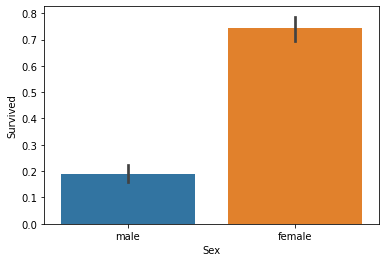

In [21]:
# 시각화를 통해 직관적으로 판단할 수 있도록 도울 수 있음
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

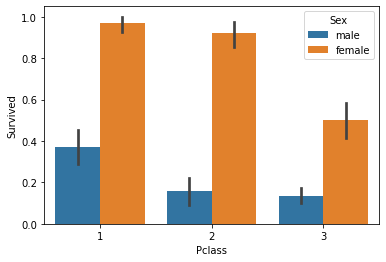

In [22]:
# 2) 부자 또는 유명인과 생존 상관관계
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [23]:
# 나이에 따른 생존 상관관계
# 나이는 값 종류가 다양하므로 범위(범주)별로 구분해서 파악

def get_category(age):
    category = ''
    if age <= -1 : category = 'Unknown'
    elif age <= 5 : category = 'Baby'
    elif age <= 12 : category = 'Child'
    elif age <= 18 : category = 'Teenager'
    elif age <= 25 : category = 'Student'
    elif age <= 35 : category = 'Yong Adult'
    elif age <= 60 : category = 'Adult'
    else : category = 'Elderly'
        
    return category

In [24]:
plt.figure(figsize=(10, 6))

# x축 names
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Yong Adult', 'Adult', 'Elderly']

titanic_df['Age_Category'] = titanic_df['Age'].apply(lambda x : get_category(x))

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='Age_Category', ylabel='Survived'>

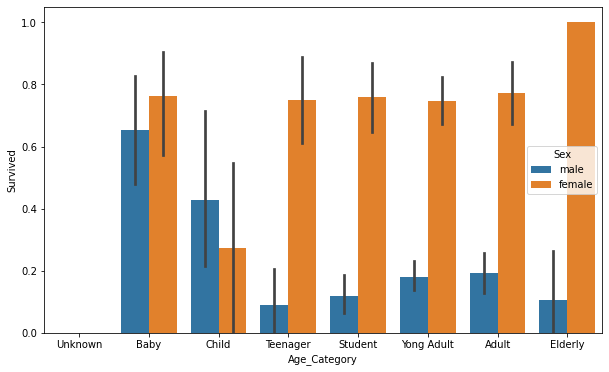

In [25]:
# 막대 그래프 크기 조정
plt.figure(figsize=(10, 6))

sns.barplot(x='Age_Category', y='Survived', hue='Sex', data=titanic_df, order=group_names)

### 지금까지의 전처리 작업을 한번에 수행할 수 있도록 함수로 만들어두기

In [29]:
from sklearn.preprocessing import LabelEncoder

# null 처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

# 머신러닝 알고리즘에게 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def encoding_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    fetures = ['Cabin', 'Sex', 'Embarked']
    for feature in fetures :
        le = LabelEncoder()
        le = le.fit(df[feature]) 
        df[feature] = le.transform(df[feature])
    return df

# 최종 전처리 수행
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = encode_features(df)
    return df

* 새로 만든 함수를 이용해서 다시 원본 데이터를 최종 전처리

In [30]:
# 원본 데이터 로드
titanic_df = pd.read_csv('data/titanic_train.csv')

# 레이블 데이터 셋
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

# 학습할 피처리 데이터 셋 - 전체 전처리
X_titanic_df = transform_features(X_titanic_df)

In [31]:
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,146,3
1,1,0,38.0,1,0,71.2833,81,0
2,3,0,26.0,0,0,7.9250,146,3
3,1,0,35.0,1,0,53.1000,55,3
4,3,1,35.0,0,0,8.0500,146,3


### 모델 학습

In [32]:
#  학습 세트와 테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [35]:
# 예측 시 많이 사용하는 알고리즘 3가지를 통해 각각 예측하고 평가하기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)

# 각 알고리즘 별로 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecistionTree accuraty : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForest accuraty : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression accuraty : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecistionTree accuraty : 0.7989
RandomForest accuraty : 0.8436
LogisticRegression accuraty : 0.8715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
